In [40]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [41]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [42]:
# Read dataset

%%time
df_path = 'Enrian_DS_Assignment_Data.csv'

try:
    df = pd.read_csv(df_path)
except pd.errors.ParserError as e:
    print(f'Error while parsing CSV file: {e}')

df.shape

CPU times: user 398 ms, sys: 65.6 ms, total: 464 ms
Wall time: 464 ms


(381109, 12)

In [43]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Tenure,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,487,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,404,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,461,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,345,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,331,152,39,0


In [44]:
df.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [45]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Tenure,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,368.299486,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,207.300930,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,32.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,294.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,382.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,475.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,6508.000000,163.000000,299.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Tenure                381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [47]:
# Method for reducing the memory usage
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [48]:
df = reduce_mem_usage(df)

Mem. usage decreased to 14.17 Mb (59.4% reduction)


In [49]:
# Replace uppercase characters of dataframe column names with lowercase
df.columns = df.columns.str.lower()

In [50]:
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,tenure,response
0,1,Male,44,1,28,0,> 2 Years,Yes,487,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,404,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,461,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,345,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,331,152,39,0


In [51]:
df.gender.value_counts()

gender
Male      206089
Female    175020
Name: count, dtype: int64

In [52]:
df.driving_license.value_counts()

driving_license
1    380297
0       812
Name: count, dtype: int64

In [53]:
df.previously_insured.value_counts()

previously_insured
0    206481
1    174628
Name: count, dtype: int64

In [54]:
df.vehicle_age.value_counts()

vehicle_age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [55]:
df.vehicle_damage.value_counts()

vehicle_damage
Yes    192413
No     188696
Name: count, dtype: int64

In [56]:
# Create bins for 'age'
bins = [df['age'].min(),
        df['age'].mean() - df['age'].std(),
        df['age'].mean(),
        df['age'].mean() + df['age'].std(),
        df['age'].max()]

# Split dataset acording to the bins
bins_df = pd.cut(df['age'], bins=bins)

# Create groups with bins
data_set_size = df.groupby(bins_df).size().reset_index(name='count')

print("Bins and sizes:")
print(data_set_size)

Bins and sizes:
                age   count
0    (20.0, 23.311]   61677
1  (23.311, 38.823]  135087
2  (38.823, 54.334]  111402
3    (54.334, 85.0]   66711


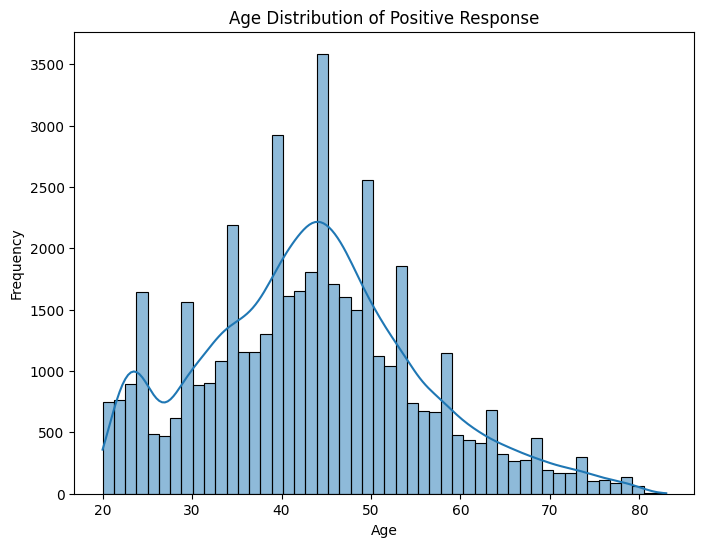

In [57]:
# Visualize distribution of age over positive response
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df.response == 1], x='age', bins=50, kde=True)
plt.title('Age Distribution of Positive Response')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

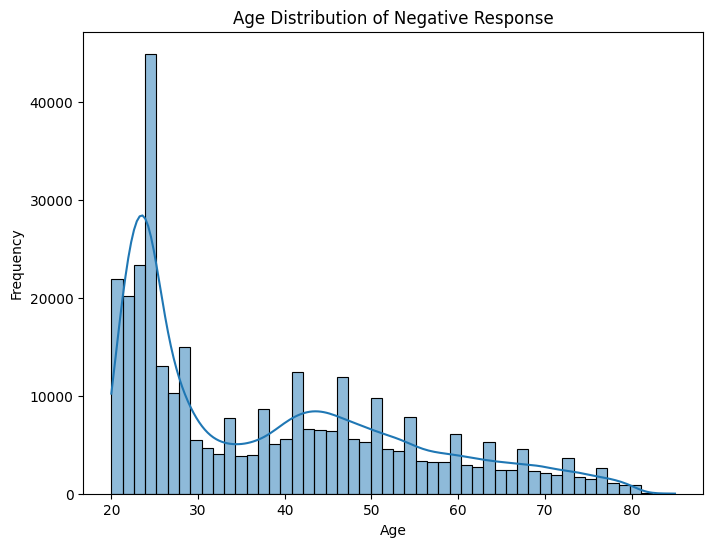

In [58]:
# Visualize distribution of vehicle age over negative response
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df.response == 0], x='age', bins=50, kde=True)
plt.title('Age Distribution of Negative Response')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

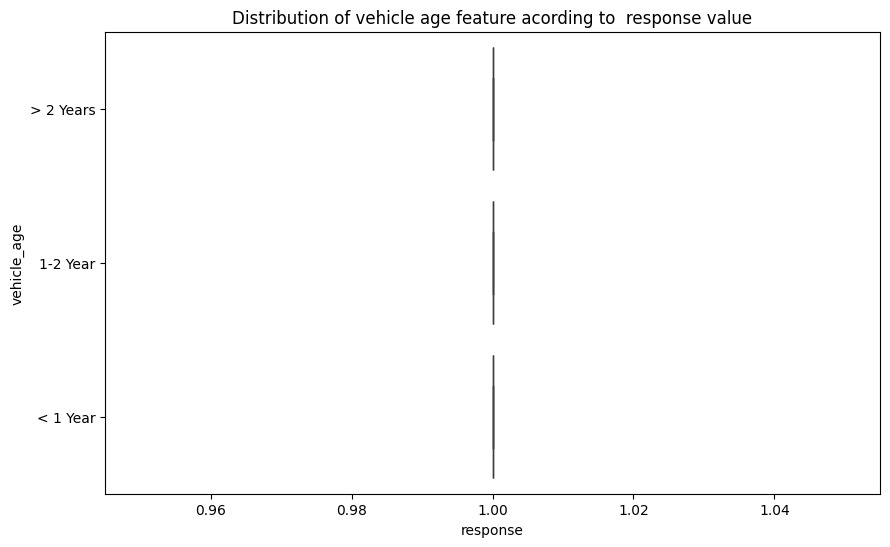

In [59]:

# visualize the distribution of the 'vehicle_age' feature by grouping it according to the 'positive response' feature.
plt.figure(figsize=(10, 6))
sns.boxplot(x='response', y='vehicle_age', data=df[df.response == 1])
plt.title('Distribution of vehicle age feature acording to  response value')
plt.xlabel('response')
plt.ylabel('vehicle_age')
plt.show()

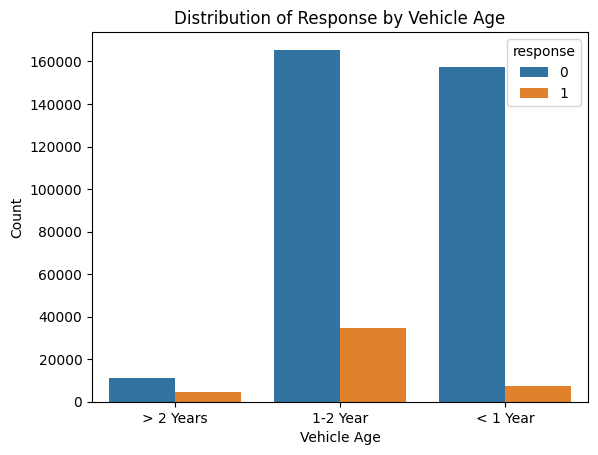

In [60]:
# visualize the distribution of the 'vehicle_age' feature by grouping it according to the 'response' feature.
sns.countplot(x='vehicle_age', hue='response', data=df)

# Label coordinates
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Response by Vehicle Age')

# Display Plots
plt.show()

In [61]:
# Create a new column 'is_female' with boolean values
df['is_female'] = df['gender'] == 'Female'
# Convert boolean values to 1 for True and 0 for False
df['is_female'] = df['is_female'].astype(int)
# Drop the 'gender' column from the DataFrame
df.drop(columns=['gender'], inplace=True)

In [64]:
# Create a new column 'is_damage' with boolean values
df['is_damage'] = df['vehicle_damage'] == 'Yes'
# Convert boolean values to 1 for True and 0 for False
df['is_damage'] = df['is_damage'].astype(int)
# Drop the 'vehicle_damage' column from the DataFrame
df.drop(columns=['vehicle_damage'], inplace=True)

In [65]:
df.head()

,id,age,driving_license,region_code,previously_insured,vehicle_age,annual_premium,policy_sales_channel,tenure,response,is_female,is_damage
0,1,44,1,28,0,> 2 Years,487,26,217,1,0,1
1,2,76,1,3,0,1-2 Year,404,26,183,0,0,0
2,3,47,1,28,0,> 2 Years,461,26,27,1,0,1
3,4,21,1,11,1,< 1 Year,345,152,203,0,0,0
4,5,29,1,41,1,< 1 Year,331,152,39,0,1,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    381109 non-null  int32
 1   age                   381109 non-null  int8 
 2   driving_license       381109 non-null  int8 
 3   region_code           381109 non-null  int8 
 4   previously_insured    381109 non-null  int8 
 5   vehicle_age           381109 non-null  int64
 6   annual_premium        381109 non-null  int16
 7   policy_sales_channel  381109 non-null  int16
 8   tenure                381109 non-null  int16
 9   response              381109 non-null  int8 
 10  is_female             381109 non-null  int64
 11  is_damage             381109 non-null  int64
dtypes: int16(3), int32(1), int64(3), int8(5)
memory usage: 14.2 MB


In [67]:
df.vehicle_age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [68]:
# Define a mapping dictionary
mapping = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}

# Map the values in the 'vehicle_age' column to integers
df['vehicle_age'] = df['vehicle_age'].map(mapping)

# Display the updated DataFrame
df.head()

,id,age,driving_license,region_code,previously_insured,vehicle_age,annual_premium,policy_sales_channel,tenure,response,is_female,is_damage
0,1,44,1,28,0,2,487,26,217,1,0,1
1,2,76,1,3,0,1,404,26,183,0,0,0
2,3,47,1,28,0,2,461,26,27,1,0,1
3,4,21,1,11,1,0,345,152,203,0,0,0
4,5,29,1,41,1,0,331,152,39,0,1,0


In [75]:
%%time
# Calculating correlation
#corr_df = corr_df[cols_4_corr].copy()
df_corr = df[df.columns.to_list()[:9] + df.columns.to_list()[10:] + [df.columns.to_list()[9]]]

corr = df_corr.corr()
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.1
top_corr_columns = cr.loc[:, 'response'][:-1]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.1].sort_values(ascending=False)


len(best_accurate_columns)

CPU times: user 317 ms, sys: 0 ns, total: 317 ms
Wall time: 331 ms


5

In [76]:
best_accurate_columns

is_damage               0.354400
vehicle_age             0.221874
age                     0.111147
policy_sales_channel   -0.139042
previously_insured     -0.341170
Name: response, dtype: float64

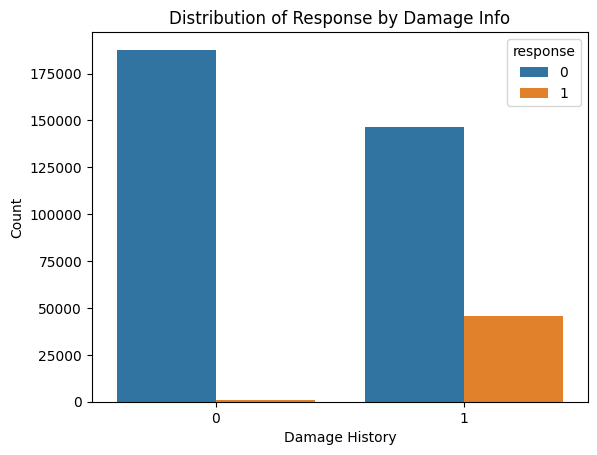

In [77]:
# visualize the distribution of the 'is_damage' feature by grouping it according to the 'response' feature.
sns.countplot(x='is_damage', hue='response', data=df)

# Label coordinates
plt.xlabel('Damage History')
plt.ylabel('Count')
plt.title('Distribution of Response by Damage Info')

# Display Plots
plt.show()

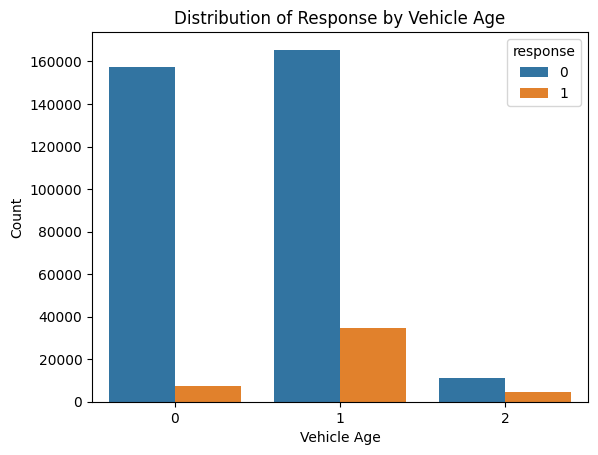

In [78]:
# visualize the distribution of the 'vehicle_age' feature by grouping it according to the 'response' feature.
sns.countplot(x='vehicle_age', hue='response', data=df)

# Label coordinates
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Response by Vehicle Age')

# Display Plots
plt.show()

In [79]:
# Train XGBoost model to determine feature importance
import xgboost as xgb

X = df.select_dtypes(exclude=['object', 'datetime64']).drop(columns=['response'])
y = df['response']

# Convert DataFrame to DMatrix format
dtrain = xgb.DMatrix(X, label=y)

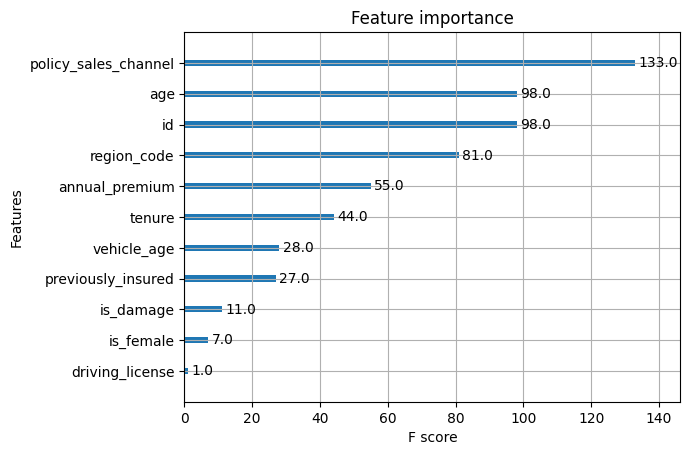

In [80]:
# Set parameters for XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse'              # Root Mean Squared Error as evaluation metric
}

# Train XGBoost model
model = xgb.train(params, dtrain)

# Plot feature importance
xgb.plot_importance(model)
plt.show()

In [81]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage']))

                      Missing Values  Percentage
id                                 0         0.0
age                                0         0.0
driving_license                    0         0.0
region_code                        0         0.0
previously_insured                 0         0.0
vehicle_age                        0         0.0
annual_premium                     0         0.0
policy_sales_channel               0         0.0
tenure                             0         0.0
response                           0         0.0
is_female                          0         0.0
is_damage                          0         0.0
